In [263]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import folium
import json

In [264]:
# Import 'Chocolate bar rating 2022' dataset 

df = pd.read_csv(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /df_choc_bar_rating_clean.csv', index_col = False)

In [265]:
path = r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off'

In [266]:
country_geo = r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /Ex 6.3/world-countries.json'



In [267]:
country_geo

'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /Ex 6.3/world-countries.json'

In [268]:
# Consistency checks 

df.duplicated() #no duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
2583    False
2584    False
2585    False
2586    False
2587    False
Length: 2588, dtype: bool

In [269]:
df.isnull().sum() # ingredients missing 87 values, however I won't use the variables for the map

Unnamed: 0                           0
REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Year                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [270]:
# Check values for Company Location

Comploc_values = df['Company Location'].values

In [271]:
for Comploc_values in Comploc_values:
     print(Comploc_values)

U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
France
U.S.A.
U.S.A.
U.S.A.
U.S.A.
Fiji
Fiji
Fiji
Fiji
Vanuatu
Vanuatu
Vanuatu
Vanuatu
Ecuador
Ecuador
Mexico
U.K.
U.K.
U.K.
France
France
France
France
France
France
Netherlands
Netherlands
Netherlands
Netherlands
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
Spain
Spain
Spain
Spain
Russia
Russia
Peru
Peru
Canada
Canada
Canada
Canada
Canada
Canada
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Italy
Brazil
Brazil
Brazil
Brazil
Brazil
U.S.A.
U.S.A.
U.S.A.
U.S.A.
France
France
France
France
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U.S.A.
U

<Axes: xlabel='Rating', ylabel='Count'>

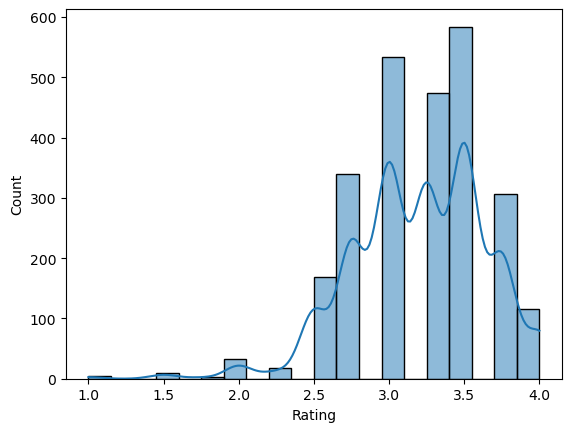

In [272]:
# Check the rating variables 

sns.histplot(df['Rating'], bins=20, kde = True)

In [273]:
df.head()

Unnamed: 0   REF Company (Manufacturer) Company Location  Review Year  \
0           0  2454                   5150           U.S.A.         2019   
1           1  2454                   5150           U.S.A.         2019   
2           2  2458                   5150           U.S.A.         2019   
3           3  2542                   5150           U.S.A.         2021   
4           4  2542                   5150           U.S.A.         2021   

  Country of Bean Origin Specific Bean Origin or Bar Name Cocoa Percent  \
0               Tanzania            Kokoa Kamili, batch 1           76%   
1             Madagascar           Bejofo Estate, batch 1           76%   
2     Dominican Republic                  Zorzal, batch 1           76%   
3                   Fiji            Matasawalevu, batch 1           68%   
4                  India                Anamalai, batch 1           68%   

  Ingredients Most Memorable Characteristics  Rating  
0    3- B,S,C      rich cocoa, fatty, bready    3.25  
1    3- B,S,C   cocoa, blackberry, full body    3.75  
2    3- B,S,C         cocoa, vegetal, savory    3.50  
3    3- B,S,C            chewy, off, rubbery    3.00  
4    3- B,S,C  milk brownie, macadamia,chewy    3.50

In [274]:
# Check values Country of Bean Origin

Comploc_values_2 = df['Country of Bean Origin'].values

In [275]:
for Comploc_values_2 in Comploc_values_2:
     print(Comploc_values_2)

Tanzania
Madagascar
Dominican Republic
Fiji
India
Venezuela
Uganda
Bolivia
Peru
Panama
Madagascar
Brazil
Ecuador
Colombia
Burma
Papua New Guinea
Venezuela
Peru
Peru
Peru
Venezuela
Cuba
Venezuela
Venezuela
Peru
Togo
Togo
Togo
Peru
Sao Tome
Venezuela
Peru
Mexico
Indonesia
Peru
Bolivia
Peru
Peru
Mexico
Peru
Fiji
Fiji
Fiji
Fiji
Vanuatu
Vanuatu
Vanuatu
Vanuatu
Ecuador
Ecuador
Mexico
Madagascar
Brazil
Indonesia
Venezuela
Peru
Trinidad
Vietnam
Madagascar
Mexico
Ecuador
Nicaragua
Tanzania
Vietnam
Venezuela
Dominican Republic
Bolivia
Bolivia
Peru
Nicaragua
Peru
Bolivia
Peru
Ecuador
Dominican Republic
Madagascar
Venezuela
Venezuela
Indonesia
Venezuela
Dominican Republic
Ecuador
Venezuela
Papua New Guinea
Ghana
Ecuador
Ecuador
Ghana
Peru
Peru
Peru
Peru
Belize
Madagascar
Dominican Republic
Papua New Guinea
Venezuela
Peru
Blend
Ecuador
Jamaica
Grenada
Venezuela
Trinidad
Blend
Peru
Madagascar
Venezuela
Venezuela
Blend
Blend
Brazil
Brazil
Brazil
Brazil
Brazil
Dominican Republic
Bolivia
Belize
Guatema

In [276]:
# Create a subset for data plot for 'Country of Bean Origin'

data_to_plot = df[['Country of Bean Origin', 'Rating']]

In [277]:
# Change countries names to match JSON file for the 'Country of Bean Origin'

df['Country of Bean Origin'] = df['Country of Bean Origin'].replace({
    'U.S.A.': 'United States of America',
    'DR Congo': 'Democratic Republic of the Congo'
})


In [289]:
# Create choropleth map for 'Country of Bean Origin', 'Rating'

map = folium.Map(location = [40,-97], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['Country of Bean Origin', 'Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

map

In [290]:
# Save map

map.save(os.path.join(path,'Map1.html'))

In [279]:
# Change countries names to match JSON file for the 'Company Location'


df['Company Location'] = df['Company Location'].replace({
    'U.S.A.': 'United States of America',
    'U.K.': 'United Kingdom',
    'U.A.E.' : 'United Arab Emirates'
})


In [280]:
# Create a subset for data plot for 'Company Location'

data_to_plot2 = df[['Company Location', 'Rating']]

In [291]:
# Create choropleth map for 'Company Location', 'Rating'

map = folium.Map(location = [40,-95], zoom_start = 4)

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['Company Location', 'Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)

folium.LayerControl().add_to(map)

map

In [292]:
# Save map 

map.save(os.path.join(path,'Map2.html'))

In [284]:
# Results : Based on the first map, it seems the best rated beans come from South America (incl. Columbia and Venezuela), Ghana in Africa and Australia. In the second map, it seems that the most favored and best rated companies are located mostly in Europe (incl. Germany, UK and Spain), Canada and South America (incl. Chile and Bolivia)


